In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [6]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()


np.int64(11)

In [10]:
df = df.dropna()
df['TotalCharges'].isnull().sum()


np.int64(0)

In [11]:
# Set analysis date (pretend current date is Jan 2025)
analysis_date = pd.to_datetime("2025-01-01")

# Create signup date based on tenure
df['signup_date'] = analysis_date - pd.to_timedelta(df['tenure']*30, unit='D')

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,signup_date
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2024-12-02
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2022-03-18
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2024-11-02
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2021-04-22
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2024-11-02


In [13]:
import sqlite3

# Create connection
conn = sqlite3.connect("churn_analysis.db")



In [14]:
df.to_sql("customers", conn, index=False, if_exists="replace")
print("Database created and table saved.")


Database created and table saved.


In [16]:
query = """
SELECT
    COUNT(*) AS total_customers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(
        100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*),
        2
    ) AS churn_rate_percent
FROM customers;
"""

pd.read_sql_query(query, conn)


,total_customers,churned_customers,churn_rate_percent
0,7032,1869,26.58


In [17]:
query = """
SELECT
    Contract,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(
        100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*),
        2
    ) AS churn_rate_percent
FROM customers
GROUP BY Contract
ORDER BY churn_rate_percent DESC;
"""

pd.read_sql_query(query, conn)


,Contract,total_customers,churned_customers,churn_rate_percent
0,Month-to-month,3875,1655,42.71
1,One year,1472,166,11.28
2,Two year,1685,48,2.85


In [18]:
query = """
SELECT
    ROUND(SUM(MonthlyCharges), 2) AS total_monthly_revenue,
    ROUND(SUM(CASE WHEN Churn = 'Yes' THEN MonthlyCharges ELSE 0 END), 2) AS revenue_at_risk,
    ROUND(
        100.0 * SUM(CASE WHEN Churn = 'Yes' THEN MonthlyCharges ELSE 0 END) / SUM(MonthlyCharges),
        2
    ) AS revenue_loss_percent
FROM customers;
"""

pd.read_sql_query(query, conn)


,total_monthly_revenue,revenue_at_risk,revenue_loss_percent
0,455661.0,139130.85,30.53


In [19]:
query = """
SELECT
    Churn,
    ROUND(AVG(MonthlyCharges), 2) AS avg_monthly_charge
FROM customers
GROUP BY Churn;
"""

pd.read_sql_query(query, conn)


,Churn,avg_monthly_charge
0,No,61.31
1,Yes,74.44


In [20]:
query = """
SELECT
    Contract,
    ROUND(AVG(MonthlyCharges), 2) AS avg_monthly_charge,
    ROUND(
        100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*),
        2
    ) AS churn_rate
FROM customers
GROUP BY Contract
ORDER BY churn_rate DESC;
"""

pd.read_sql_query(query, conn)


,Contract,avg_monthly_charge,churn_rate
0,Month-to-month,66.40,42.71
1,One year,65.08,11.28
2,Two year,60.87,2.85


In [21]:
query = """
SELECT
    CASE
        WHEN tenure <= 12 THEN '0-12 Months'
        WHEN tenure <= 24 THEN '13-24 Months'
        WHEN tenure <= 48 THEN '25-48 Months'
        ELSE '49+ Months'
    END AS tenure_group,

    COUNT(*) AS total_customers,

    ROUND(
        100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*),
        2
    ) AS churn_rate

FROM customers
GROUP BY tenure_group
ORDER BY churn_rate DESC;
"""

pd.read_sql_query(query, conn)


,tenure_group,total_customers,churn_rate
0,0-12 Months,2175,47.68
1,13-24 Months,1024,28.71
2,25-48 Months,1594,20.39
3,49+ Months,2239,9.51


In [22]:
query = """
SELECT
    CASE
        WHEN tenure <= 12 THEN '0-12 Months'
        WHEN tenure <= 24 THEN '13-24 Months'
        WHEN tenure <= 48 THEN '25-48 Months'
        ELSE '49+ Months'
    END AS tenure_group,

    Contract,

    COUNT(*) AS total_customers

FROM customers
GROUP BY tenure_group, Contract
ORDER BY tenure_group, Contract;
"""

pd.read_sql_query(query, conn)


,tenure_group,Contract,total_customers
0,0-12 Months,Month-to-month,1994
1,0-12 Months,One year,123
2,0-12 Months,Two year,58
3,13-24 Months,Month-to-month,737
4,13-24 Months,One year,197
5,13-24 Months,Two year,90
6,25-48 Months,Month-to-month,802
7,25-48 Months,One year,518
8,25-48 Months,Two year,274
9,49+ Months,Month-to-month,342


In [24]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()


,count
Churn,


In [25]:
df_model = df.drop(['customerID', 'signup_date'], axis=1)
df_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,NaN
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,NaN
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NaN


In [26]:
df_model = pd.get_dummies(df_model, drop_first=True)
df_model.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,NaN,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,NaN,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,NaN,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,NaN,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,NaN,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [27]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (5625, 30)
Test size: (1407, 30)


In [32]:
X_train.isnull().sum().sum()



np.int64(0)

In [33]:
X_train.dtypes.value_counts()

,count
bool,26
int64,2
float64,2


In [34]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)


In [35]:
X_train.dtypes.value_counts()


,count
int64,30


In [38]:
import numpy as np

print("NaNs in X_train:", np.isnan(X_train).sum().sum())
print("NaNs in X_test:", np.isnan(X_test).sum().sum())


NaNs in X_train: 0
NaNs in X_test: 0


In [39]:
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())


Infinite values in X_train: 0


In [40]:
# Recreate df_model properly
df_model = df.drop(['customerID', 'signup_date'], axis=1)

# Convert target again just to be safe
df_model['Churn'] = df_model['Churn'].map({1: 1, 0: 0})

# One-hot encode
df_model = pd.get_dummies(df_model, drop_first=True)

# Convert everything to float
df_model = df_model.astype(float)

# Split again
from sklearn.model_selection import train_test_split

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
X_train.dtypes.value_counts()


,count
float64,30


In [44]:

df_model = df.copy()

# Drop unnecessary columns
df_model = df_model.drop(['customerID', 'signup_date'], axis=1)

# One-hot encode
df_model = pd.get_dummies(df_model, drop_first=True)

# Convert everything to float
df_model = df_model.astype(float)

# Check target
df_model['Churn'].isnull().sum()


np.int64(7032)

In [45]:
# Reload dataset fresh
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Fix TotalCharges again
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()

# Convert target properly ONCE
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['Churn'].value_counts()


,count
Churn,
0,5163
1,1869


In [46]:

analysis_date = pd.to_datetime("2025-01-01")
df['signup_date'] = analysis_date - pd.to_timedelta(df['tenure']*30, unit='D')

# Prepare model dataframe
df_model = df.drop(['customerID', 'signup_date'], axis=1)

# One-hot encode
df_model = pd.get_dummies(df_model, drop_first=True)

# Convert to float
df_model = df_model.astype(float)


df_model['Churn'].isnull().sum()


np.int64(0)

In [47]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(5625, 30) (1407, 30)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[915 118]
 [181 193]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1033
         1.0       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


ROC-AUC Score:
0.8319235288940887


In [52]:

# Custom threshold
threshold = 0.35
y_pred_custom = (y_prob >= threshold).astype(int)

print("Confusion Matrix (Threshold = 0.35):")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))


Confusion Matrix (Threshold = 0.35):
[[808 225]
 [110 264]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      1033
         1.0       0.54      0.71      0.61       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.76      0.77      1407



In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]


In [54]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_prob_rf))


Confusion Matrix:
[[934  99]
 [194 180]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1033
         1.0       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407


ROC-AUC Score:
0.8189518613042329


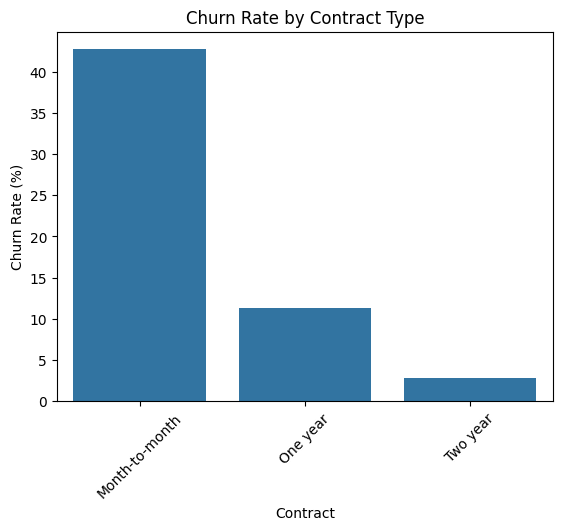

In [55]:

contract_churn = pd.read_sql_query("""
SELECT
    Contract,
    ROUND(
        100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*),
        2
    ) AS churn_rate
FROM customers
GROUP BY Contract
ORDER BY churn_rate DESC;
""", conn)

plt.figure()
sns.barplot(data=contract_churn, x="Contract", y="churn_rate")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()


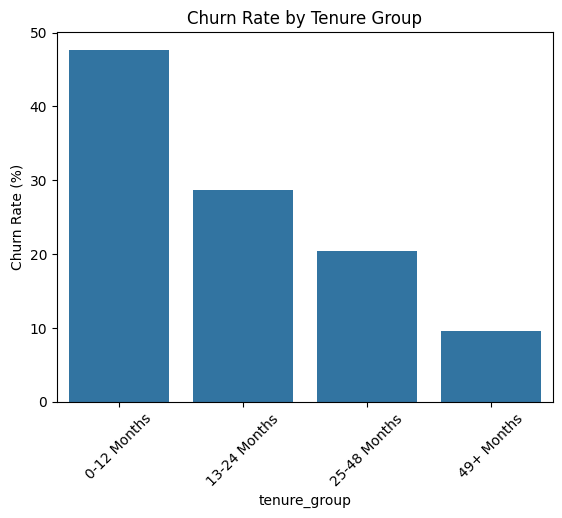

In [56]:
tenure_churn = pd.read_sql_query("""
SELECT
    CASE
        WHEN tenure <= 12 THEN '0-12 Months'
        WHEN tenure <= 24 THEN '13-24 Months'
        WHEN tenure <= 48 THEN '25-48 Months'
        ELSE '49+ Months'
    END AS tenure_group,

    ROUND(
        100.0 * SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) / COUNT(*),
        2
    ) AS churn_rate

FROM customers
GROUP BY tenure_group
ORDER BY churn_rate DESC;
""", conn)

plt.figure()
sns.barplot(data=tenure_churn, x="tenure_group", y="churn_rate")
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()


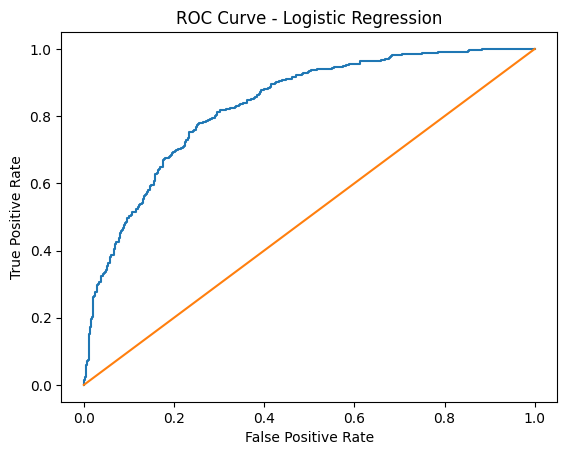

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


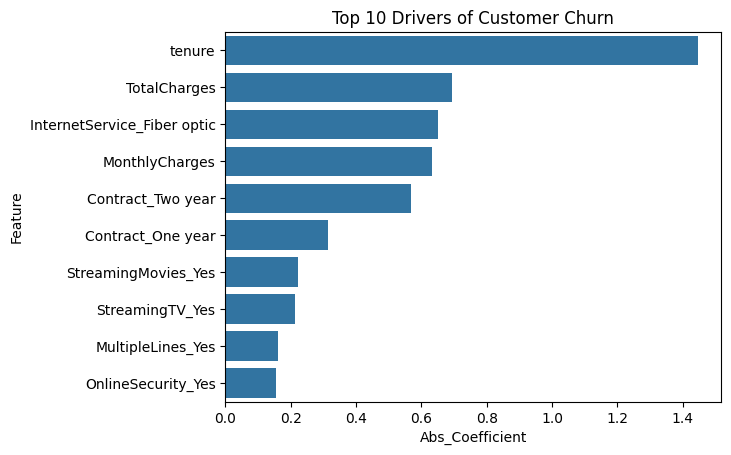

In [58]:


feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

feature_importance["Abs_Coefficient"] = np.abs(feature_importance["Coefficient"])

top_features = feature_importance.sort_values(
    by="Abs_Coefficient",
    ascending=False
).head(10)

plt.figure()
sns.barplot(data=top_features, x="Abs_Coefficient", y="Feature")
plt.title("Top 10 Drivers of Customer Churn")
plt.show()


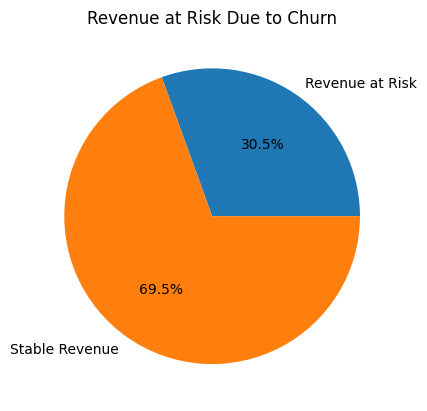

In [59]:
revenue_data = pd.read_sql_query("""
SELECT
    SUM(MonthlyCharges) AS total_revenue,
    SUM(CASE WHEN Churn = 'Yes' THEN MonthlyCharges ELSE 0 END) AS churn_revenue
FROM customers;
""", conn)

labels = ["Revenue at Risk", "Stable Revenue"]
values = [
    revenue_data['churn_revenue'][0],
    revenue_data['total_revenue'][0] - revenue_data['churn_revenue'][0]
]

plt.figure()
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Revenue at Risk Due to Churn")
plt.show()
